<p>
Good data science involves not only making predictions from data, but also calculating confidence. Consider a binary random variable described by a Bernoulli process: $\text{P}(X \, | \, \theta) = \theta^X(1 - \theta)^{1-X}$. Furthermore, suppose we know the parameter value: $\theta = 0.5$. Now, supposing we only have a small data sample, how close is our sample mean to the population mean? 
</p>
<p>
When the sample size varies, our sample means vary. We can think of this sample mean as being draw from a distribution. In fact, this distribution is known as the <b>sampling distribution</b>. And since it's a distribution, it will a mean and standard deviation. Let's run two experiments. For experiment A, we'll take 1000 samples (10 observations each) and compute the mean of each sample. A histogram will be used to plot these means. For experiment B, the only difference is that the samples are 100 observations each.
</p>

Standard Deviation from Experiment 1 (n=10): 0.157641492
Standard Deviation from Experiment 2 (n=100): 0.0487335777468


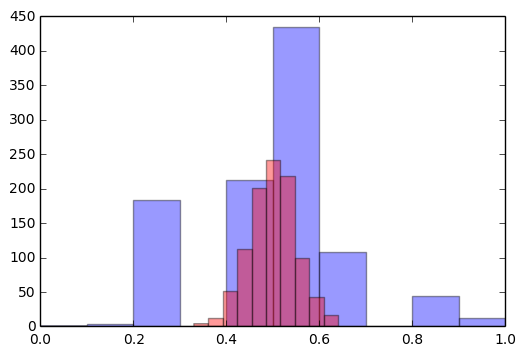

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.xlim([0.,1.])

# Experiment 1
sample_means = [np.mean(np.random.binomial(n=1, p=0.5, size=10)) for i in xrange(1000)]
print 'Standard Deviation from Experiment 1 (n=10): {0}'.format(np.std(sample_means))
plt.hist(sample_means, alpha=0.4, color='blue')

# Experiment 1
sample_means = [np.mean(np.random.binomial(n=1, p=0.5, size=100)) for i in xrange(1000)]
print 'Standard Deviation from Experiment 2 (n=100): {0}'.format(np.std(sample_means))
plt.hist(sample_means, alpha=0.4, color='red')

plt.show()

Note how both experiments are centered around 0.5 (the popoluation mean), but the widths (i.e., standard deviation) of the distributions differ. The standard deviation of a sampling distribution has a name: the <b>standard error</b>. Also note, that the standard deviations shrink as our sample size increase. In fact, if we didn't know theory, we could plot this relationship:

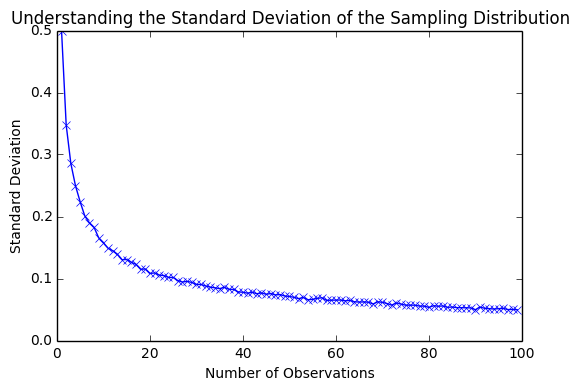

In [3]:
n_ = range(1,100)
stds = []
for n in n_:
    std = np.std([np.mean(np.random.binomial(n=1, p=0.5, size=n)) for i in xrange(1000)])
    stds.append(std)

plt.title('Understanding the Standard Deviation of the Sampling Distribution')
plt.xlabel('Number of Observations')
plt.ylabel('Standard Deviation')
plt.plot(n_, stds, marker='x')
plt.show()

The relationship seems to have a relationship like $\sigma \propto {n^{-\beta}}$. Where $n$ is the number of observations, and $\beta$ is some unknown positive constant. We can run linear regression after transforming into log space:

In [4]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(n_), np.log(stds))
print slope, intercept, r_value, p_value, std_err

-0.499820511108 -0.695415827401 -0.999240601864 1.59399063942e-138 0.00197890720535


Now, to get the multiplicative constant to make the proportion exact, we take the exponential of the intercept: 

In [5]:
np.exp(intercept)

0.49886696229650562

<p>
The slope suggests that $\beta = \frac{1}{2}$. Thus, it looks like $\sigma_{err} = \frac{0.5}{\sqrt{n}}$ But also note, that the standard deviation of the Bernoulli distribution is equal to $\sqrt{p(1-p)}$. Since $p=0.5$, this yields $0.5$. Thus, might it be that final form is $\sigma_{err} = \frac{\sigma}{\sqrt{n}}$?
</p>

<p>
Well, let's take a step back and think. Let's consider a sample of $n$ observations.
</p>

<p>
$X_1, X_2, ..., X_n$
</p>

And compute it's sample mean

<p>
$s = \frac{1}{n} \sum_i X_i$
</p>

Now, let's compute the mean of this sample mean (i.e., the mean of the sampling distribution)

<p>
$E[s] = E[\frac{1}{n} \sum_i X_i] = \frac{1}{n} E[ \sum_i X_i] = \frac{1}{n} n \mu = \mu$
</p>

<p>
That is, the expectation value of the sampling distribution of the mean is the population mean. Let's calculate the variance:
</p>

<p>
$Var[s] = Var[\frac{1}{n} \sum_i X_i] = \frac{1}{n^2} Var[ \sum_i X_i] = \frac{1}{n^2} n \sigma^2 = \frac{\sigma^2}{n}$
</p>

<p>And of course, the standard deviation is the square root of the variance. Therefore, the standard error is predicted to be $\frac{\sigma}{\sqrt{n}}$. This is exactly what we observed in our simulation.
</p>